# Spatial interpolation module

The Midgard **math.spatial_interpolation** module provides functionality to carry out spatial interpolation.

## Use spatial_interpolation module

An example is shown, how to use the `math.spatial_interpolation.interpolate_for_position` function, whereby for given position the velocity is determined based on a grid file. As velocity model is the NKG_RF17vel used, which is given as a GeoTIFF file.

In [3]:
# Import interpolation module
from midgard.math import spatial_interpolation

# Write list with available interpolators
spatial_interpolation.interpolators()

['griddata', 'rect_bivariate_spline', 'regular_grid_interpolator']

In [16]:
# Third party import
# NOTE: THE RASTERIO MODULE ARE NOT PART OF MIDGARD INSTALLATION. THEY
#       HAVE TO BE INSTALLED. THE MODULE IS USED TO READ GEOTIFF FILES.
import numpy as np
import rasterio

# Import Position and Unit class and spatial interpolation module
from midgard.data.position import Position
from midgard.math import spatial_interpolation

# Read GeoTIFF file with velocity information for a grid with position in 
# longitude and latitude given in radian
data = rasterio.open("../examples/math/eur_nkg_nkgrf17vel.tif")

# Get x and y coordinates of grid points (pixel center), whereby in this case
# x=longitude and y=latitude
cols, rows = np.meshgrid(np.arange(data.width), np.arange(data.height))
grid_lon, grid_lat = rasterio.transform.xy(data.transform, rows, cols)
grid_lon = np.array(grid_lon)
grid_lat = np.array(grid_lat)

# Get position in latitude/longitude for which velocity should be determined
pos = Position(val=[2102928.189605, 721619.617278, 5958196.398820], system="trs")
lat = np.rad2deg(pos.llh.lat)
lon = np.rad2deg(pos.llh.lon)

# Read VX, VY and VZ grid bands from GEOTIFF
grid_ve = data.read(1) 
grid_vn = data.read(2) 
grid_vu = data.read(3) 

# Interpolate in VE, VN and VU grids for given position
kind = "griddata"
ve = spatial_interpolation.interpolate(grid_lon, grid_lat, grid_ve, lon, lat, kind=kind)  # Reference: -0.902 mm/yr
vn = spatial_interpolation.interpolate(grid_lon, grid_lat, grid_vn, lon, lat, kind=kind)  # Reference: 0.325 mm/yr
vu = spatial_interpolation.interpolate(grid_lon, grid_lat, grid_vu, lon, lat, kind=kind)  # Reference: 2.874 mm/yr
print(ve, vn, vu)
#print(f"Velocity: ({ve:.4f}, {vn:.4f}, {vu:.4f}) mm/yr for LAT {lat:.3f} deg, LON {lon:.3f} deg)")


-0.9022585872701584 0.32464620609058004 2.874549946195039


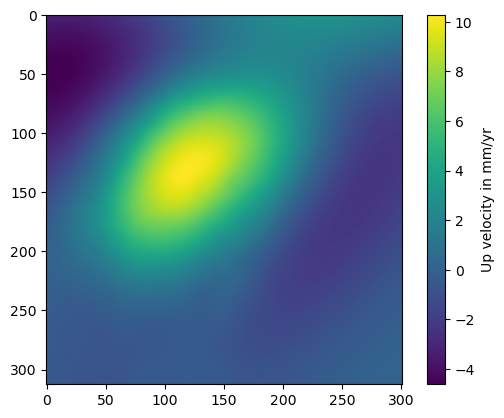

In [15]:
import matplotlib.pyplot as plt
plt.imshow(grid_vu)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Up velocity in mm/yr')#, rotation=270)
plt.show()